# Homework 11: PARKING TICKETS


In [1]:
import pandas as pd

**1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!**

In [2]:
#As the datatypes in all of the columns vary, I decided to to make all the values, except for the ones I specify
#into str. This also takes care of questions 1. -> dtype=str

**2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.**

In [3]:
# The syntax for this is really very nice and clear, an example na_values= {'Vehicle Year' : ['0']}
# A lot more here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

**3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.**

In [4]:
#parse_dates=True,keep_date_col = True

import datetime
import datetime as dt

dt.datetime.strptime('08/04/2013', '%m/%d/%Y')
datetime.datetime(2013, 8, 4, 0, 0)

parser = lambda date: pd.datetime.strptime(date, '%m/%d/%Y')

#taken from here: http://stackoverflow.com/questions/23797491/parse-dates-in-pandas
#adding this, column counts starts at 0, without index, parse_dates=[4], date_parser=parser

#nrows=100000,

In [5]:
df = pd.read_csv("violations.csv", na_values= {'Vehicle Year' : ['0']}, parse_dates=[4], date_parser=parser, dtype=str)

In [6]:
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,NaN,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,2013-08-08,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [7]:
#df.info()

**4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.**

In [8]:
#df['Date First Observed'].value_counts()

In [9]:
import dateutil.parser

In [10]:
def date_transfer(x):
    x = str(x)
    if x == '0':
        return 'NaN'
    try:
        date = dateutil.parser.parse(x)
        return str(date.strftime('%d/%m/%Y'))
    except:
        return 'NaN'    
    #    dt.datetime.strptime('20130719', '%Y%m%d')
    #    datetime.datetime(2013, 7, 19, 0, 0)
    #    year_month_tag = dateutil.parser.parse(x)
    return x
print(date_transfer(20151118))

18/11/2015


In [11]:
df['Date First Observed'].apply(date_transfer).head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Date First Observed, dtype: object

**5. "Violation time" is... not a time. Make it a time.**

In [12]:
#adding n_values = {'Violation Time' : ['0']}
#df = pd.read_csv("violations.csv", na_values= {'Vehicle Year' : ['0'], 'Violation Time' : ['0']}, parse_dates=[4], date_parser=parser, dtype=str)

In [13]:
df['Violation Time'].head(5)

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
Name: Violation Time, dtype: object

In [14]:
#df['Violation Time'].value_counts()

In [15]:
import dateutil

def pmam(x):
    x = str(x)
    #x = (':'.join(a+b for a,b in zip(x[::2], x[1::2])))
    if x == 'NaN':
        pass
    try:
        x = str(x[:2] + ':' + x[2:])
        date = dateutil.parser.parse(x)
        return str(date.strftime('%H:%M %p'))
    except:
        return 'NaN'

print(pmam('NaN'))
print(pmam("0752A"))
print(pmam("1240P"))
print(pmam("0232P"))

NaN
07:52 AM
12:40 PM
14:32 PM


In [16]:
df['Violation Time pmam'] = df['Violation Time'].apply(pmam)

**6. There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.**

In [17]:
df['Vehicle Color'].head(10)

0       GY
1       WH
2      NaN
3       WH
4       BR
5       RD
6       GN
7    WHITE
8    WHITE
9    BLACK
Name: Vehicle Color, dtype: object

In [18]:
def black_and_white(car_color):
    car_color = str(car_color)
    if car_color == 'NaN':
        return 'NaN'
    elif car_color == 'WHITE':
        return car_color
    elif car_color == 'BLACK':
        return car_color
    else:
        return car_color.replace("BK","BLACK").replace("WH", "WHITE")                                                                                                                                

In [19]:
def rainbow(car_color):
    car_color = str(car_color)
    if car_color == 'NaN':
        return car_color
    elif car_color == 'BROWN':
        return car_color
    elif car_color == 'BLUE':
        return car_color
    elif car_color == 'RED':
        return car_color
    elif car_color == 'GREY':
        return car_color
    elif car_color == 'GREEN':
        return car_color
    else:
        return car_color.replace("BR","BROWN").replace("RD", "RED").replace("GY", "GRAY").replace("TN", "TAN").replace("BLU", "BLUE").replace("GN", "GREEN")

In [20]:
df['Vehicle Color'].apply(black_and_white).apply(rainbow).head(5)

0     GRAY
1    WHITE
2      nan
3    WHITE
4    BROWN
Name: Vehicle Color, dtype: object

**7.Join the data with the Parking Violations Code dataset from the NYC Open Data site.**

In [21]:
DOF_Parking_Violation_Codes_df = pd.read_csv("Parking_Fine_Codes_Man_Quota.csv")
DOF_Parking_Violation_Codes_df.head()

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,Manhattan Quota
0,10,"Stopping, standing or parking where a sign, st...",115.0,115.0,1.0
1,11,Hotel Loading/Unloading: Standing or parking w...,115.0,115.0,1.0
2,12,Snow Emergency: Standing or parking where stan...,95.0,95.0,1.0
3,13,Taxi Stand: Standing or parking where standing...,115.0,115.0,1.0
4,14,General No Standing: Standing or parking where...,115.0,115.0,1.0


In [22]:
def make_code_int(code):
    return int(code)

In [23]:
df['Violation Code int'] = df['Violation Code'].apply(make_code_int)

In [24]:
df_merged = df.merge(DOF_Parking_Violation_Codes_df, left_on='Violation Code int', right_on='CODE')

In [25]:
df_merged.head(1)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Violation Time pmam,Violation Code int,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,Manhattan Quota
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,07:52 AM,46,46,Standing or parking on the roadway side of a v...,115.0,115.0,1.0


**8. How much money did NYC make off of parking violations?**

In [26]:
Mininum_Amount = df_merged['All Other Areas'].sum()

In [27]:
Mininum_Amount

300970265.0

In [28]:
print("NYC made at least: ${:,.2f} off parking fines.".format(Mininum_Amount))

NYC made at least: $300,970,265.00 off parking fines.


**9. What's the most lucrative kind of parking violation? The most frequent?**

In [29]:
def def_strip(definition):
    return definition.strip()

In [30]:
df_merged['DEFINITION_stripped'] = df_merged['DEFINITION'].apply(def_strip)

In [31]:
#Most frequent kind of parking violation
df_merged['DEFINITION'].value_counts().head(1)

Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device.    706228
Name: DEFINITION, dtype: int64

In [32]:
count_by_violation_code = df_merged['CODE'].value_counts()

In [33]:
count_by_violation_code.head()

21    706228
38    674091
14    468987
37    407106
20    299391
Name: CODE, dtype: int64

In [34]:
df_merged.groupby('CODE')['All Other Areas'].sum().sort_values(ascending=False).head()

CODE
14    53933505.0
21    31780260.0
46    29633890.0
40    28869025.0
38    23593185.0
Name: All Other Areas, dtype: float64

In [35]:
Most_lucrative_amount = df_merged.groupby('CODE')['All Other Areas'].sum().sort_values(ascending=False).head(1)
Most_lucrative_amount

CODE
14    53933505.0
Name: All Other Areas, dtype: float64

In [36]:
Most_lucrative_fine_in_words = df_merged[df_merged['CODE'] == 14]

In [37]:
Most_lucrative_fine_in_words = Most_lucrative_fine_in_words['DEFINITION'].head(1)
Most_lucrative_fine_in_words

257686    General No Standing: Standing or parking where...
Name: DEFINITION, dtype: object

**10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?**

In [38]:
df_merged['Registration State'].value_counts().head(10)

NY    3103838
NJ     439615
PA     112614
CT      70654
FL      57367
MA      40476
VA      31730
MD      26450
NC      24211
IN      17283
Name: Registration State, dtype: int64

In [39]:
Fines_for_New_York_Cars = df_merged.groupby('Registration State')['All Other Areas'].sum().sort_values(ascending=False).head(1)

In [40]:
Fines_for_New_York_Cars

Registration State
NY    221829545.0
Name: All Other Areas, dtype: float64

In [41]:
Mininum_Amount #Total fines

300970265.0

In [42]:
print("New York City makes ${:,.2f} off non-New-York cars.".format(Mininum_Amount - 4152340.0)) 

New York City makes $296,817,925.00 off non-New-York cars.


In [43]:
#Double Check:
df_merged[df_merged['Registration State'] != 'NY'].sum()

Violation Code int            3.158730e+07
CODE                          3.158730e+07
Manhattan 96th St. & below    9.059571e+07
All Other Areas               7.914072e+07
Manhattan Quota               1.329699e+06
dtype: float64

**11. Make a chart of the top few.**

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

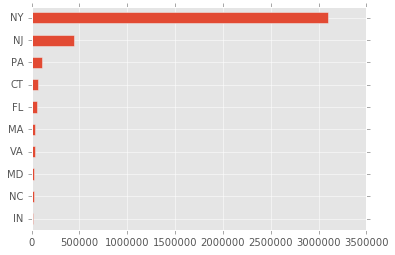

In [45]:
df_merged['Registration State'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')


**12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm,6pm-12am.**

In [46]:
import dateutil

def Time_of_day(x):
    x = str(x)
    #x = (':'.join(a+b for a,b in zip(x[::2], x[1::2])))
    if x == 'NaN':
        pass
    try:
        x = str(x[:2] + ':' + x[2:])
        date = dateutil.parser.parse(x)
        time = int(str(date.strftime('%H')))
        if time <= 6:
            return '12am - 6am'
        elif time <= 12:
            return '6am - 12pm'
        elif time <= 18:
            return '12pm - 6pm'
        elif time <= 24:
            return '6pm - 12am'
    except:
        return 'NaN'

In [47]:
df_merged['Time of Day'] = df['Violation Time'].apply(Time_of_day)

In [48]:
df_merged['Time of Day'].value_counts()

6am - 12pm    2056194
12pm - 6pm    1548470
12am - 6am     283503
6pm - 12am     246758
NaN              1255
Name: Time of Day, dtype: int64

**14. Make a graph of the number of tickets per day.**

In [49]:
df_merged['Issue Date'].head()

0   2013-08-04
1   2013-08-04
2   2013-08-05
3   2013-08-05
4   2013-07-23
Name: Issue Date, dtype: datetime64[ns]

In [50]:
#Filtering out all the dates that were in the future and before 2013, obviously wrong dates.
df_merged_only_2013_dates = df_merged[(df_merged['Issue Date'] > '2013-01-01') & (df_merged['Issue Date'] < '2013-12-31')]

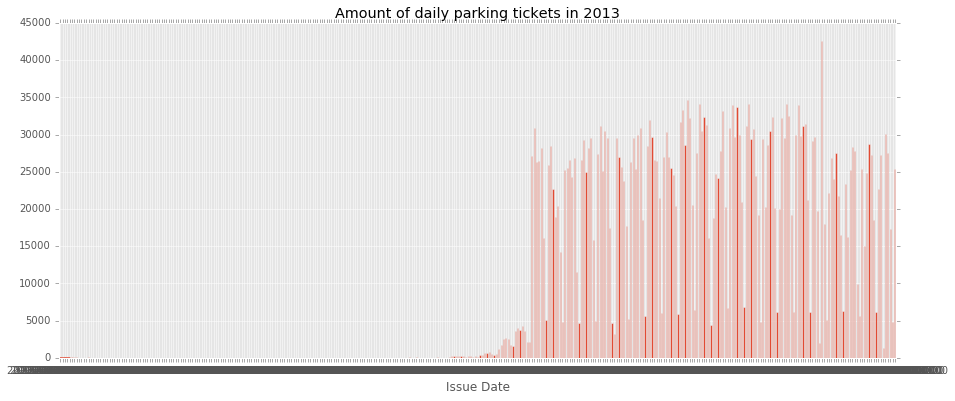

In [51]:
#More on histograms
#http://stackoverflow.com/questions/27365467/python-pandas-plot-histogram-of-dates
#http://stackoverflow.com/questions/29672375/histogram-in-matplotlib-time-on-x-axis
#plt.axis('off')
import matplotlib.pyplot as plt

plt.plot(range(5))
plt.gca().xaxis.set_major_locator(plt.NullLocator())
df_merged_only_2013_dates.groupby('Issue Date')['Issue Date'].count().plot(kind="bar", figsize=(15, 6), legend=None, title='Amount of daily parking tickets in 2013')
plt.show()

**15. Make a graph of the amount of revenue collected per day.**

In [52]:
df_merged['Issue Date'].head()

0   2013-08-04
1   2013-08-04
2   2013-08-05
3   2013-08-05
4   2013-07-23
Name: Issue Date, dtype: datetime64[ns]

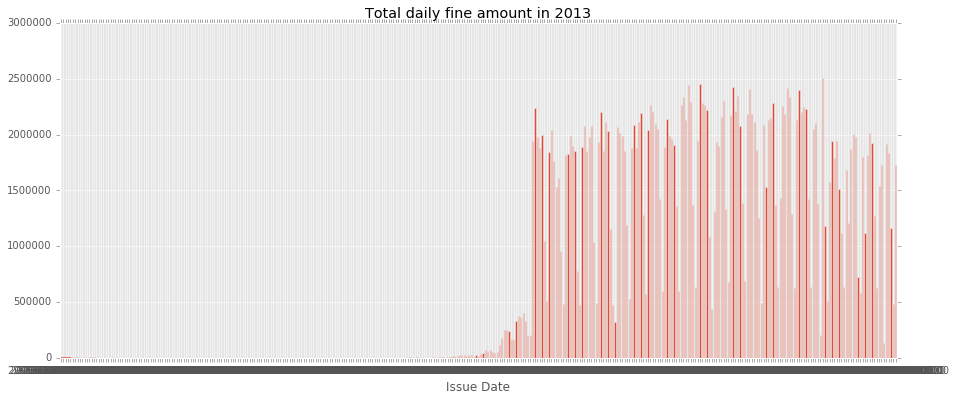

In [53]:
plt.plot(range(5))
plt.gca().xaxis.set_major_locator(plt.NullLocator())
df_merged_only_2013_dates.groupby('Issue Date')['All Other Areas'].sum().plot(kind="bar", figsize=(15, 6), legend=None, title='Total daily fine amount in 2013')
plt.show()

**16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.**

In [54]:
df_boroughs = pd.read_csv("NYC_Boroughs3.csv")

In [55]:
df_boroughs.head()

,borough name,abbreviation,Total
0,Manhattan (New York),NY,748583
1,Bronx,BX,456847
2,Brooklyn,K,983769
3,Queens,Q,1134064
4,Staten Island (Richmond),R,304250


**17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!**

In [56]:
def county_harm(county):
    county = str(county)
    if county == 'NaN':
        return
    else:
        return county.replace("BRONX","BX").replace("KINGS", "K").replace("NYC", "NY").replace("QUEEN", "Q").replace("RC", "R").replace("RICH", "R")

In [57]:
df_merged['Violation County harm'] = df_merged['Violation County'].apply(county_harm)

In [58]:
summed_fine_amounts_by_county = df_merged.groupby('Violation County harm')['All Other Areas'].sum()

In [59]:
#creating dataframe
fine_amounts = pd.DataFrame(summed_fine_amounts_by_county)

In [60]:
#changing the index into column
fine_amounts.reset_index(inplace=True)

In [61]:
fine_amounts

,Violation County harm,All Other Areas
0,103,115.0
1,BX,30048810.0
2,K,64711810.0
3,NY,148098375.0
4,Q,53339930.0
5,R,2253620.0
6,nan,2517605.0


In [62]:
#Joining the two new datasets
df_ticket_dollars_per_licence = fine_amounts.merge(df_boroughs, left_on='Violation County harm', right_on='abbreviation')

In [63]:
df_ticket_dollars_per_licence

,Violation County harm,All Other Areas,borough name,abbreviation,Total
0,BX,30048810.0,Bronx,BX,456847
1,K,64711810.0,Brooklyn,K,983769
2,NY,148098375.0,Manhattan (New York),NY,748583
3,Q,53339930.0,Queens,Q,1134064
4,R,2253620.0,Staten Island (Richmond),R,304250


In [64]:
df_ticket_dollars_per_licence['Ticket Dollars per Licence'] = df_ticket_dollars_per_licence['All Other Areas'] / df_ticket_dollars_per_licence['Total']

In [65]:
#Dividing one dataset by the other
df_ticket_dollars_per_licence[['borough name', 'abbreviation', 'Ticket Dollars per Licence']]

,borough name,abbreviation,Ticket Dollars per Licence
0,Bronx,BX,65.774340
1,Brooklyn,K,65.779477
2,Manhattan (New York),NY,197.838282
3,Queens,Q,47.034321
4,Staten Island (Richmond),R,7.407132
